In [2]:
pip install numpy pandas matplotlib scikit-learn

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   --------- ------------------------------ 2.6/11.3 MB 11.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.3 MB 9.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.3 MB 9.3 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.3 MB 7.1 MB/s eta 0:00:01
   ------------------------ --------------- 7.1/11.3 MB 6.4 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.3 MB 6.3 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.3 MB 6.3 MB/s eta 0:0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
# Part 1 - Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Importing the dataset
dataset=pd.read_csv("Churn_Modelling.csv")
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [11]:
# Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [12]:
# Concatenate the dataframes
X=pd.concat([X,geography,gender],axis=1)

# Drop Unnecessary columns
X=X.drop(["Geography","Gender"],axis=1)

In [13]:
# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)

(8000, 11)


In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
# Part 2 - Now let's make the ANN!
# Importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [21]:
# Initializing the ANN
classifier=Sequential()

# Adding the input layer
classifier.add(Input(shape=(11,)))  # 11 input features

# Adding the first hidden layer
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))
# Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer="he_uniform",activation="sigmoid"))

In [23]:
# Compiling the ANN
classifier.compile(optimizer="Adamax",loss="binary_crossentropy",metrics=["accuracy"])

## Fitting the ANN to the Training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7202 - loss: 0.6215 - val_accuracy: 0.7955 - val_loss: 0.5218
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7959 - loss: 0.5180 - val_accuracy: 0.7955 - val_loss: 0.4817
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 0.4877 - val_accuracy: 0.7955 - val_loss: 0.4634
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7938 - loss: 0.4725 - val_accuracy: 0.7955 - val_loss: 0.4542
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7923 - loss: 0.4589 - val_accuracy: 0.7952 - val_loss: 0.4487
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7984 - loss: 0.4448 - val_accuracy: 0.7952 - val_loss: 0.4453
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7972 - loss: 0.4408 - val_accuracy: 0.7948 - val_loss: 0.4430
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8051 - loss: 0.4313 - val_accu

In [24]:
# list all data in history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


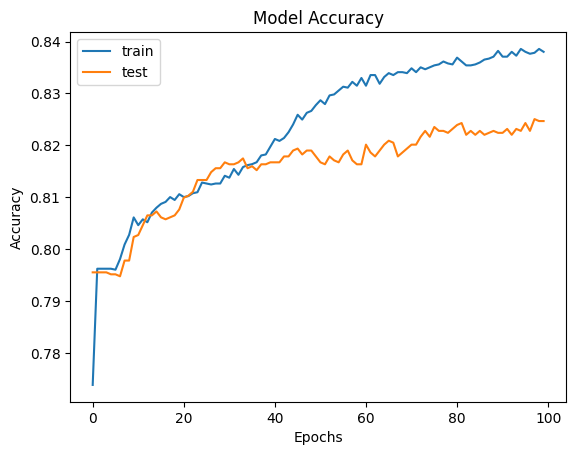

In [26]:
# Summarize history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","test"],loc="upper left")
plt.show()

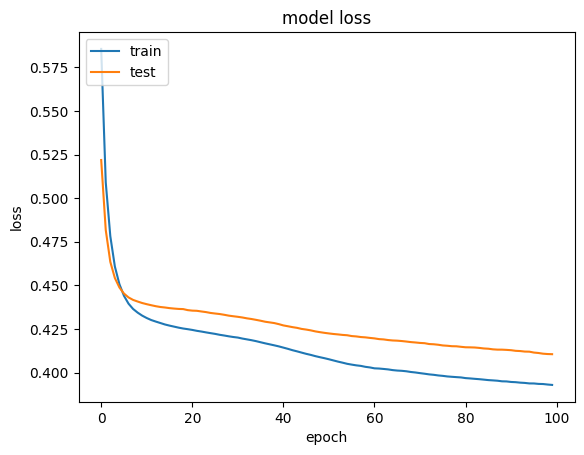

In [27]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# Part 3 - Making the predictions and evaluating the model

y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[1525   70]
 [ 249  156]]
0.8405


In [ ]:
## Model gives a 84